In [185]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def my_mpl_style():
    '''Sets my preferred style options for matplotlib.'''
    import matplotlib as mpl
    # Font sizes
    mpl.rcParams['axes.labelsize'] = 18
    mpl.rcParams['legend.fontsize'] = 14
    mpl.rcParams['axes.titlesize'] = 20  # Change the number for your preferred fontsize
    mpl.rcParams['xtick.labelsize'] = 16
    mpl.rcParams['ytick.labelsize'] = 16
    mpl.rcParams['axes.formatter.limits'] = (-2, 3)
my_mpl_style()

In [186]:
with open('data/FLUKA_data/df_FLUKA_sigma.pickle', 'rb') as f:
    df_FLUKA_sigma = pickle.load(f)

with open('data/df_monte_carlo_sigma_air.pickle', 'rb') as f:
    df_monte_carlo_sigma_air = pickle.load(f)
with open('data/df_monte_carlo_sigma_vacuum.pickle', 'rb') as f:
    df_monte_carlo_sigma_vacuum = pickle.load(f)

with open('data/df_analytic_sigma_air.pickle', 'rb') as f:
    df_analytic_sigma_air = pickle.load(f)
with open('data/df_analytic_sigma_vacuum.pickle', 'rb') as f:
    df_analytic_sigma_vacuum = pickle.load(f)

(0.0, 0.03)

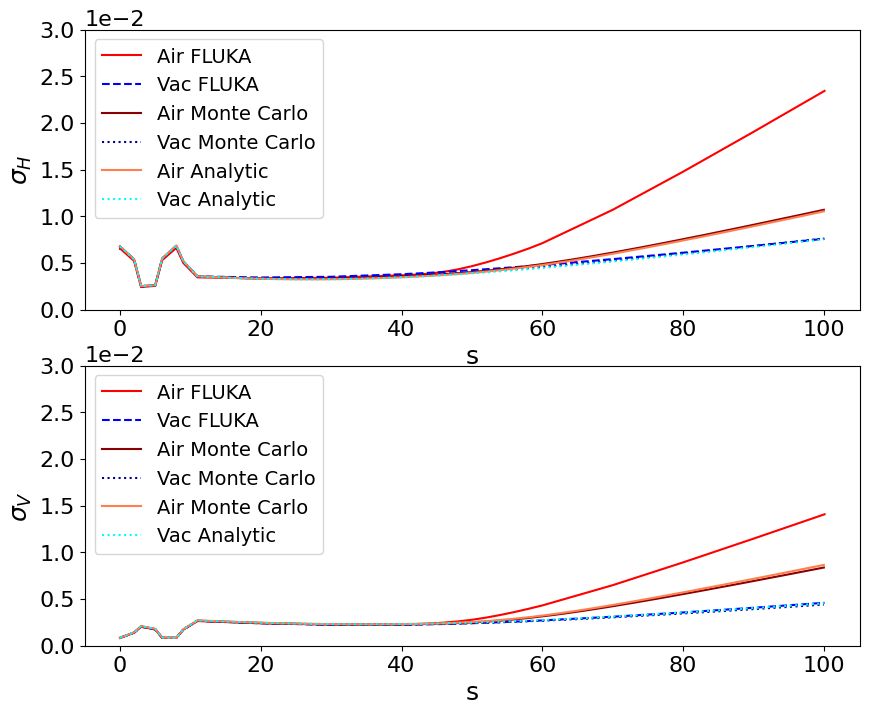

In [187]:
fig, ax = plt.subplots(2,1, figsize=(10,8))

scat_type = "air"
df_mini = df_FLUKA_sigma.loc[df_FLUKA_sigma.scat_type == scat_type]
ax[0].plot(df_mini.s/100, df_mini.sigmaH/100, c="r", label="Air FLUKA", ls="-")
ax[1].plot(df_mini.s/100, df_mini.sigmaV/100, c="r", label="Air FLUKA", ls="-")
    
scat_type = "vacuum"
df_mini = df_FLUKA_sigma.loc[df_FLUKA_sigma.scat_type == scat_type]
ax[0].plot(df_mini.s/100, df_mini.sigmaH/100, c="b", label="Vac FLUKA", ls="--")
ax[1].plot(df_mini.s/100, df_mini.sigmaV/100, c="b", label="Vac FLUKA", ls="--")

ax[0].plot(df_monte_carlo_sigma_air.s, df_monte_carlo_sigma_air.sigmaH, c="darkred", label="Air Monte Carlo")
ax[0].plot(df_monte_carlo_sigma_vacuum.s, df_monte_carlo_sigma_vacuum.sigmaH, c="darkblue", label="Vac Monte Carlo", ls = ":")

ax[1].plot(df_monte_carlo_sigma_air.s, df_monte_carlo_sigma_air.sigmaV, c="darkred", label="Air Monte Carlo")
ax[1].plot(df_monte_carlo_sigma_vacuum.s, df_monte_carlo_sigma_vacuum.sigmaV, c="darkblue", label="Vac Monte Carlo", ls = ":")

ax[0].plot(df_analytic_sigma_air.s, df_analytic_sigma_air.sigmaH/1000, c="coral", label="Air Analytic")
ax[0].plot(df_analytic_sigma_vacuum.s, df_analytic_sigma_vacuum.sigmaH/1000, c="cyan", label="Vac Analytic", ls = ":")

ax[1].plot(df_analytic_sigma_air.s, df_analytic_sigma_air.sigmaV/1000, c="coral", label="Air Monte Carlo")
ax[1].plot(df_analytic_sigma_vacuum.s, df_analytic_sigma_vacuum.sigmaV/1000, c="cyan", label="Vac Analytic", ls = ":")

ax[0].set_xlabel("s")
ax[0].set_ylabel(r"$\sigma_{H}$")
ax[0].legend()
ax[0].set_ylim(0, 0.03)

ax[1].set_xlabel("s")
ax[1].set_ylabel(r"$\sigma_{V}$")
ax[1].legend()
ax[1].set_ylim(0, 0.03)

(30.0, 65.0)

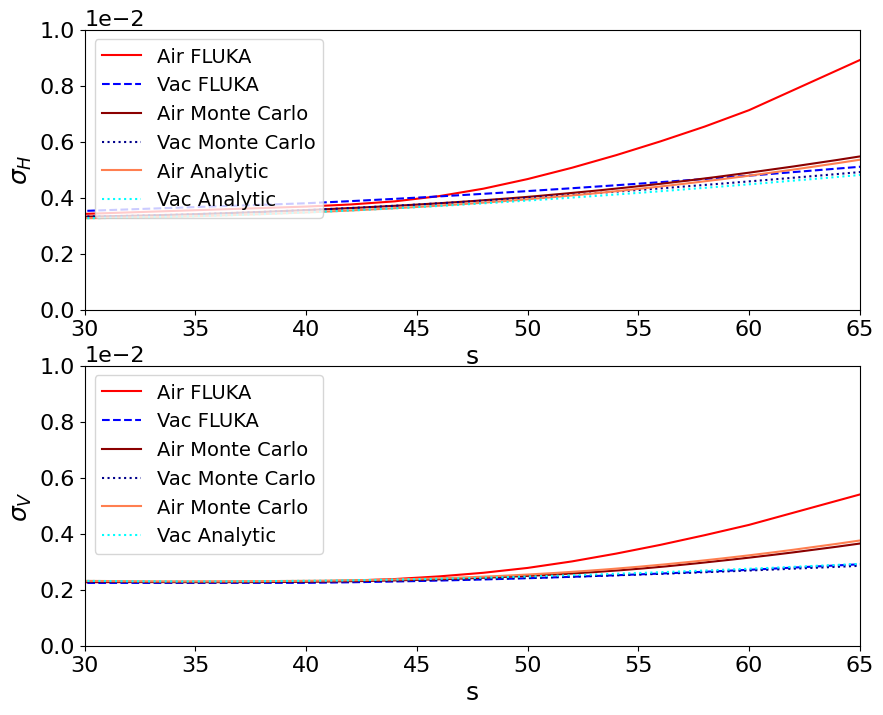

In [188]:
fig, ax = plt.subplots(2,1, figsize=(10,8))

scat_type = "air"
df_mini = df_FLUKA_sigma.loc[df_FLUKA_sigma.scat_type == scat_type]
ax[0].plot(df_mini.s/100, df_mini.sigmaH/100, c="r", label="Air FLUKA", ls="-")
ax[1].plot(df_mini.s/100, df_mini.sigmaV/100, c="r", label="Air FLUKA", ls="-")
    
scat_type = "vacuum"
df_mini = df_FLUKA_sigma.loc[df_FLUKA_sigma.scat_type == scat_type]
ax[0].plot(df_mini.s/100, df_mini.sigmaH/100, c="b", label="Vac FLUKA", ls="--")
ax[1].plot(df_mini.s/100, df_mini.sigmaV/100, c="b", label="Vac FLUKA", ls="--")

ax[0].plot(df_monte_carlo_sigma_air.s, df_monte_carlo_sigma_air.sigmaH, c="darkred", label="Air Monte Carlo")
ax[0].plot(df_monte_carlo_sigma_vacuum.s, df_monte_carlo_sigma_vacuum.sigmaH, c="darkblue", label="Vac Monte Carlo", ls = ":")

ax[1].plot(df_monte_carlo_sigma_air.s, df_monte_carlo_sigma_air.sigmaV, c="darkred", label="Air Monte Carlo")
ax[1].plot(df_monte_carlo_sigma_vacuum.s, df_monte_carlo_sigma_vacuum.sigmaV, c="darkblue", label="Vac Monte Carlo", ls = ":")

ax[0].plot(df_analytic_sigma_air.s, df_analytic_sigma_air.sigmaH/1000, c="coral", label="Air Analytic")
ax[0].plot(df_analytic_sigma_vacuum.s, df_analytic_sigma_vacuum.sigmaH/1000, c="cyan", label="Vac Analytic", ls = ":")

ax[1].plot(df_analytic_sigma_air.s, df_analytic_sigma_air.sigmaV/1000, c="coral", label="Air Monte Carlo")
ax[1].plot(df_analytic_sigma_vacuum.s, df_analytic_sigma_vacuum.sigmaV/1000, c="cyan", label="Vac Analytic", ls = ":")

ax[0].set_xlabel("s")
ax[0].set_ylabel(r"$\sigma_{H}$")
ax[0].legend()
ax[0].set_ylim(0, 0.01)
ax[0].set_xlim(30, 65)

ax[1].set_xlabel("s")
ax[1].set_ylabel(r"$\sigma_{V}$")
ax[1].legend()
ax[1].set_ylim(0, 0.01)
ax[1].set_xlim(30, 65)

# Compare distributions

In [189]:
with open('data/FLUKA_data/scattering_air_24_GeV_proton_simple_line.pickle', 'rb') as f:
    df_air = pickle.load(f)

with open('data/FLUKA_data/scattering_vacuum_24_GeV_proton_simple_line.pickle', 'rb') as f:
    df_vac = pickle.load(f)

with open('data/df_monte_carlo_vacuum.pickle', 'rb') as f:
    df_mc_vac = pickle.load(f)

with open('data/df_monte_carlo_air.pickle', 'rb') as f:
    df_mc_air = pickle.load(f)

In [190]:
df_air.keys()

Index(['p_id', 'p', 'x', 'y', 's'], dtype='object')

(-10.0, 10.0)

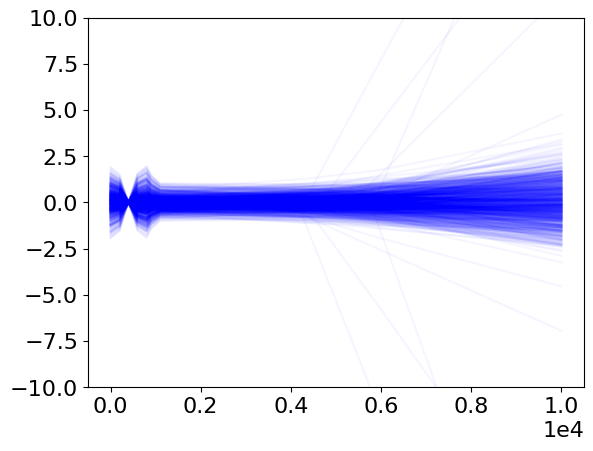

In [191]:
fig, ax = plt.subplots()

for p_id in df_air.p_id.unique():
    ax.plot(df_air.loc[df_air.p_id == p_id].s, df_air.loc[df_air.p_id == p_id].x, c="b", alpha=0.04)
ax.set_ylim(-10,10)

In [192]:
# import numpy as np
# import matplotlib.pyplot as plt
# from scipy.optimize import curve_fit
# def gaussian(x, A, mu, sigma):
#     return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

# for s in df_air.s.unique():

#     fig, ax = plt.subplots()

#     i = 0
#     for data in [df_air.loc[df_air.s == s].x / 100, df_mc_air.loc[df_mc_air.s == s/100].x]:

#         if i==0:
#             label = "FLUKA"
#         else:
#             label = "Monte Carlo (MAD-X)"
#         # Create a histogram of the data
#         hist, bins = np.histogram(data, bins=100, range=[-0.05, 0.05])
#         bin_centers = (bins[:-1] + bins[1:]) / 2
#         initial_guess = [np.max(hist), 0.0, 0.01]
#         params, covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
#         A_fit, mu_fit, sigma_fit = params

#         ax.hist(data, bins=100, range=[-0.05, 0.05], alpha=0.5)

#         x_fit = np.linspace(-0.05, 0.05, 1000)
#         y_fit = gaussian(x_fit, *params)
#         ax.plot(x_fit, y_fit, '--', label=f"{label} {sigma_fit*1000:.3f} mm")
#         i+=1

    
#     ax.set_xlabel('x')
#     ax.set_ylabel('Frequency')
#     ax.legend()
#     ax.set_title(f"s = {s/100} [m]")

In [193]:
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))


s_list_FLUKA_air = []
HSigma_FLUKA_air = []
VSigma_FLUKA_air = []
for s in np.sort(df_air.s.unique()):

    # fig, ax = plt.subplots()

    data = df_air.loc[df_air.s == s].x / 100

    # Create a histogram of the data
    hist, bins = np.histogram(data, bins=100, range=[-0.05, 0.05])
    bin_centers = (bins[:-1] + bins[1:]) / 2
    initial_guess = [np.max(hist), 0.0, 0.01]
    params, covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
    A_fit, mu_fit, sigma_fit = params

    # ax.hist(data, bins=100, range=[-0.05, 0.05], alpha=0.5)

    x_fit = np.linspace(-0.05, 0.05, 1000)
    y_fit = gaussian(x_fit, *params)
    # ax.plot(x_fit, y_fit, '--', label=f"{sigma_fit*1000:.3f} mm {np.std(data)*1000}")

    s_list_FLUKA_air.append(s/100)
    HSigma_FLUKA_air.append(np.abs(sigma_fit)*1000)

    # Vertical

    data = df_air.loc[df_air.s == s].y / 100

    # Create a histogram of the data
    hist, bins = np.histogram(data, bins=100, range=[-0.05, 0.05])
    bin_centers = (bins[:-1] + bins[1:]) / 2
    initial_guess = [np.max(hist), 0.0, 0.01]
    params, covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
    A_fit, mu_fit, sigma_fit = params

    # ax.hist(data, bins=100, range=[-0.05, 0.05], alpha=0.5)

    x_fit = np.linspace(-0.05, 0.05, 1000)
    y_fit = gaussian(x_fit, *params)
    # ax.plot(x_fit, y_fit, '--', label=f"{sigma_fit*1000:.3f} mm {np.std(data)*1000}")

    VSigma_FLUKA_air.append(np.abs(sigma_fit)*1000)
    

    
    # ax.set_xlabel('x')
    # ax.set_ylabel('Frequency')
    # ax.legend()
    # ax.set_title(f"s = {s} [m]")

In [194]:

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))


s_list_MC_air = []
HSigma_MC_air = []
VSigma_MC_air = []
for s in np.sort(df_mc_air.s.unique()):

    # fig, ax = plt.subplots()

    data = df_mc_air.loc[df_mc_air.s == s].x

    # Create a histogram of the data
    hist, bins = np.histogram(data, bins=100, range=[-0.05, 0.05])
    bin_centers = (bins[:-1] + bins[1:]) / 2
    initial_guess = [np.max(hist), 0.0, 0.01]
    params, covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
    A_fit, mu_fit, sigma_fit = params

    # ax.hist(data, bins=100, range=[-0.05, 0.05], alpha=0.5)

    x_fit = np.linspace(-0.05, 0.05, 1000)
    y_fit = gaussian(x_fit, *params)
    # ax.plot(x_fit, y_fit, '--', label=f"{sigma_fit*1000:.3f} mm {np.std(data)*1000}")

    s_list_MC_air.append(s)
    HSigma_MC_air.append(np.abs(sigma_fit)*1000)

    # Vertical

    data = df_mc_air.loc[df_mc_air.s == s].y

    # Create a histogram of the data
    hist, bins = np.histogram(data, bins=100, range=[-0.05, 0.05])
    bin_centers = (bins[:-1] + bins[1:]) / 2
    initial_guess = [np.max(hist), 0.0, 0.01]
    params, covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
    A_fit, mu_fit, sigma_fit = params

    # ax.hist(data, bins=100, range=[-0.05, 0.05], alpha=0.5)

    x_fit = np.linspace(-0.05, 0.05, 1000)
    y_fit = gaussian(x_fit, *params)
    # ax.plot(x_fit, y_fit, '--', label=f"{sigma_fit*1000:.3f} mm {np.std(data)*1000}")

    VSigma_MC_air.append(np.abs(sigma_fit)*1000)
    
    # ax.set_xlabel('x')
    # ax.set_ylabel('Frequency')
    # ax.legend()
    # ax.set_title(f"s = {s} [m]")

Text(0.5, 1.0, 'Air region comparison between simulations\n24 GeV')

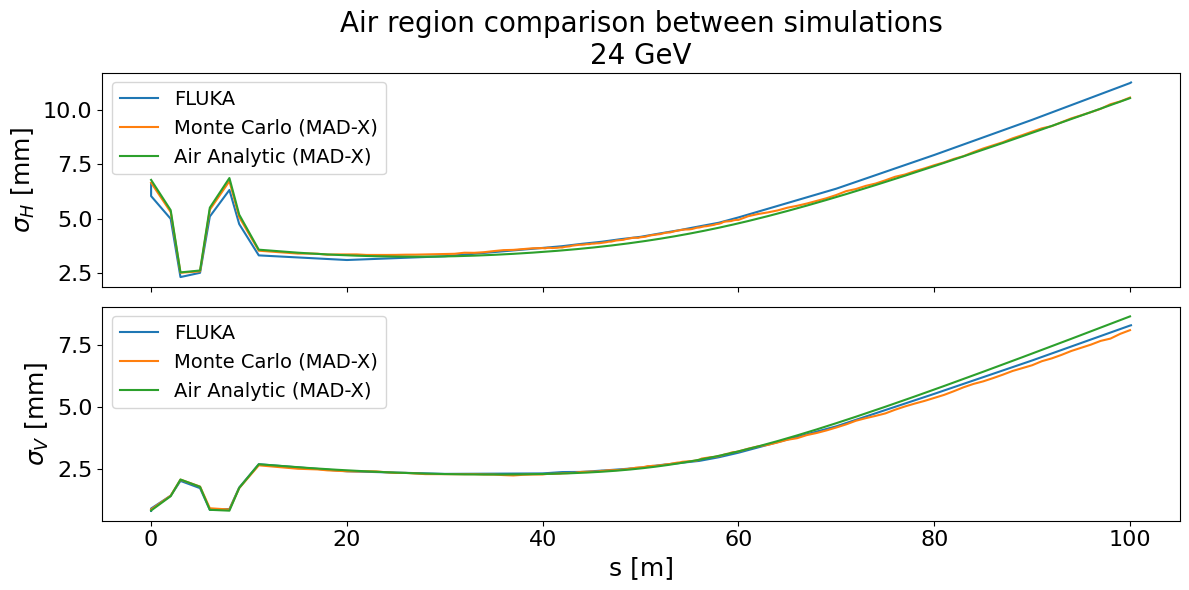

In [195]:
fig, ax = plt.subplots(2,1, tight_layout=True, sharex=True, figsize=(12, 6))

ax[0].plot(s_list_FLUKA_air, HSigma_FLUKA_air, label="FLUKA")
ax[0].plot(s_list_MC_air, HSigma_MC_air, label="Monte Carlo (MAD-X)")
ax[0].plot(df_analytic_sigma_air.s, df_analytic_sigma_air.sigmaH, label="Air Analytic (MAD-X)")
ax[0].legend()
ax[0].set_ylabel(r"$\sigma_{H}$ [mm]")

ax[1].plot(s_list_FLUKA_air, VSigma_FLUKA_air, label="FLUKA")
ax[1].plot(s_list_MC_air, VSigma_MC_air, label="Monte Carlo (MAD-X)")
ax[1].plot(df_analytic_sigma_air.s, df_analytic_sigma_air.sigmaV, label="Air Analytic (MAD-X)")
ax[1].legend()
ax[1].set_xlabel("s [m]")
ax[1].set_ylabel(r"$\sigma_{V}$ [mm]")
ax[0].set_title("Air region comparison between simulations\n24 GeV")

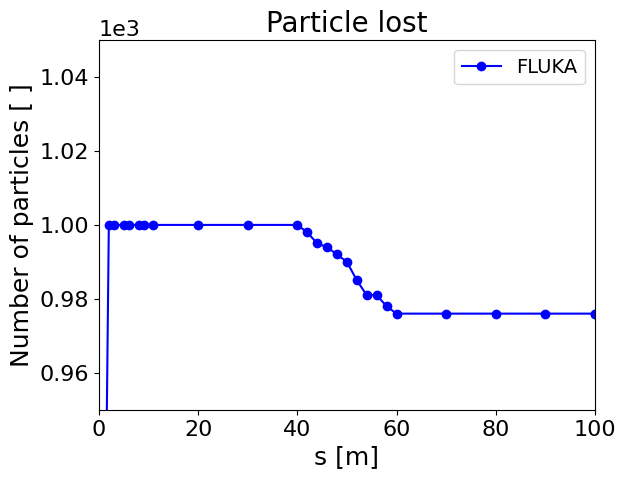

In [196]:
fig, ax = plt.subplots()

number_of_particles = []
for s in np.sort(df_air.s.unique()):
    number_of_particles.append(len(df_air.loc[df_air.s == s].x))

ax.plot(np.sort(df_air.s.unique())/100, number_of_particles, marker="o", c="b", label="FLUKA")

ax.set_xlim(0, 100)
ax.set_ylim(950, 1050)
ax.set_xlabel(f"s [m]")
ax.set_ylabel(f"Number of particles [ ]")
ax.set_title("Particle lost")
ax.legend()